# Customer Churn Analysis & Prediction

__Data info:__ The dataset contains information about customers who left the company last month. the target variable is `Churn`.

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn')

In [2]:
# Load the data
df = pd.read_csv("CustomerChurn.csv")

In [3]:
# A quick look of the dataset
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


The first five rows of the dataset provide an initial look at the structure and contents.  
Key observations:  
- Each row represents a single customer record.  
- Columns include demographic data (e.g., gender, SeniorCitizen), service details (e.g., InternetService, Contract), and financial metrics (e.g., MonthlyCharges, TotalCharges).  
- The `Churn` column indicates whether the customer left the company (Yes/No).

In [4]:
df.shape

(7043, 21)

In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

> `TotalCharges` column is of type object, but it should be of type float64.

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


> `SeniorCitizen` column is of type int64, but it can be of type bool (0 -> False, 1 -> True).

75% of the costumers have not stayed with the company for more than 4.5 years.

Most costumers paying around $64.76 per month, while 25% of them are paying over $89.85 per month.

/var/folders/2h/r62qfwn51r5c07v7wwyw305m0000gn/T/ipykernel_58485/4261090057.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, df.Churn.value_counts()[i], f'{round(df.Churn.value_counts()[i]/len(df.Churn)*100, 2)}%', ha="center", va="bottom")
/var/folders/2h/r62qfwn51r5c07v7wwyw305m0000gn/T/ipykernel_58485/4261090057.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, df.Churn.value_counts()[i], f'{round(df.Churn.value_counts()[i]/len(df.Churn)*100, 2)}%', ha="center", va="bottom")
/var/folders/2h/r62qfwn51r5c07v7wwyw305m0000gn/T/ipykernel_58485/4261090057.py:10: FutureWarning: Series.__get

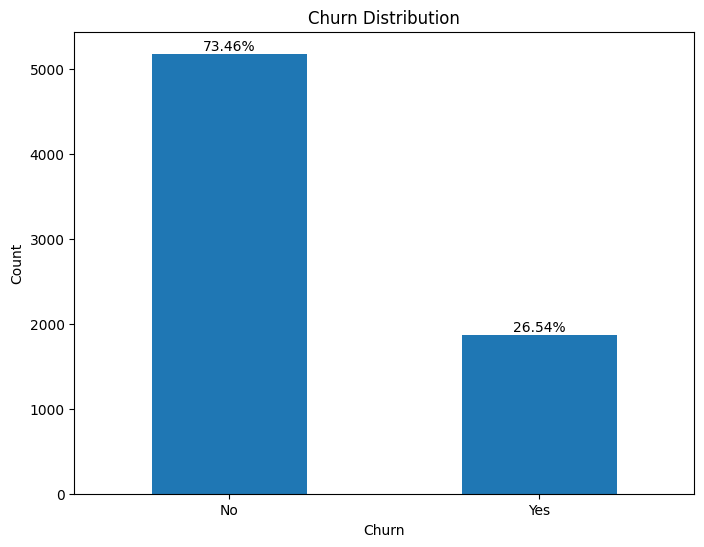

In [7]:
# Churn Distribution
df.Churn.value_counts().plot(kind="bar", figsize=(8,6))
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.yticks(rotation=0)

for i in range(len(df.Churn.value_counts())):
    plt.text(i, df.Churn.value_counts()[i], f'{round(df.Churn.value_counts()[i]/len(df.Churn)*100, 2)}%', ha="center", va="bottom")
plt.show()

> The data is imbalanced. I'll analyze the features while taking the target values separately.

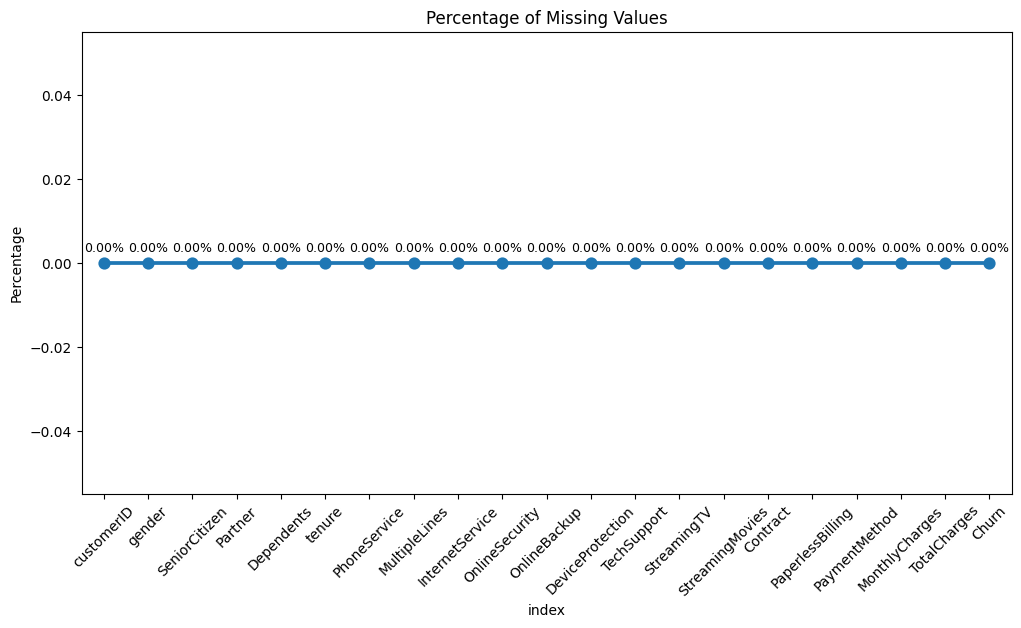

In [8]:
# Checking for null values
missing = pd.DataFrame((df.isnull().sum() * 100 / df.shape[0]).reset_index())
missing.columns = ['index', 'percentage']

# Plot
plt.figure(figsize=(12, 6))
ax = sns.pointplot(x="index", y="percentage", data=missing)
# Annotate each point
for i, row in missing.iterrows():
    ax.text(i, row["percentage"] + 0.002, f'{row["percentage"]:.2f}%', 
            ha='center', va='bottom', fontsize=9)

plt.xticks(rotation=45)
plt.ylabel("Percentage")
plt.title("Percentage of Missing Values")
plt.show()



> The dataset has no null values!

## Data Preprocessing

In [9]:
# Copying the dataset
df_copy = df.copy()

# Before we saw that `TotalCharges` column was object type, let's convert it to numeric
df_copy["TotalCharges"] = pd.to_numeric(df_copy["TotalCharges"], errors="coerce")

# Print pd.info() to check the data types of the columns
df_copy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


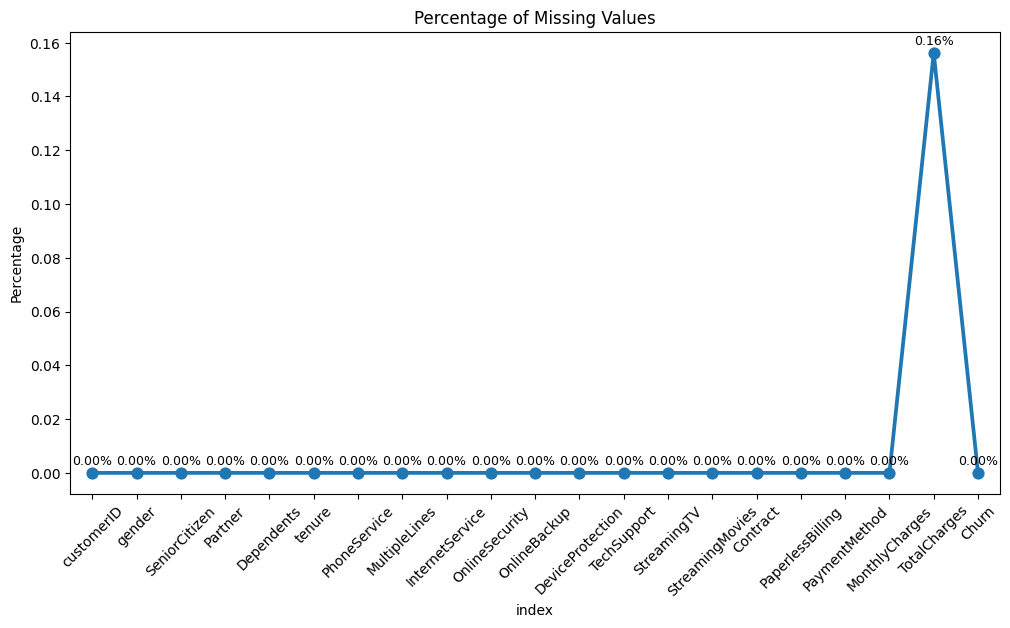

In [10]:
# Checking for null values
missing = pd.DataFrame((df_copy.isnull().sum() * 100 / df_copy.shape[0]).reset_index())
missing.columns = ['index', 'percentage']

# Plot
plt.figure(figsize=(12, 6))
ax = sns.pointplot(x="index", y="percentage", data=missing)
# Annotate each point
for i, row in missing.iterrows():
    ax.text(i, row["percentage"] + 0.002, f'{row["percentage"]:.2f}%', 
            ha='center', va='bottom', fontsize=9)

plt.xticks(rotation=45)
plt.ylabel("Percentage")
plt.title("Percentage of Missing Values")
plt.show()

> There are 11 null values in the `TotalCharges` column (0.16%), let's check them. Probably I'll delete those rows for processing because it's a small percentage of the data.

In [11]:
df_copy.loc[df_copy['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Those are the rows that contain null values in the 'TotalCharges' column, not too many so I can drop them.

In [12]:
df_copy.dropna(subset=['TotalCharges'], inplace=True)

For further preprocessing, I'll turn `tenture` to `tenure_bins` (categorical variable).
* 1-12 months
* 13-24 months
* 25-36 months
* 37-48 months
* 49-60 months
* 61-72 months

In [13]:
df_copy.tenure.max()

72

In [14]:
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]
labels

['1 - 12', '13 - 24', '25 - 36', '37 - 48', '49 - 60', '61 - 72']

In [15]:
df_copy['tenure_bins'] = pd.cut(df_copy.tenure, bins=range(1, 80, 12), right=False, labels=labels)

In [16]:
df_copy.tenure_bins.value_counts()

tenure_bins
1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: count, dtype: int64

I'll remove columns that are not needed for processing:
1. `customerID`
2. `tenure` - I'll use the binned version


In [17]:
df_copy.drop(columns=["customerID", "tenure"], inplace=True)
df_copy.head()


,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_bins
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


## Data Exploration

### Univariate Analysis

In [18]:
round(df_copy['Churn'].value_counts(normalize=True)*100, 2)

Churn
No     73.42
Yes    26.58
Name: proportion, dtype: float64

> 26% of the customers churned (left the company).

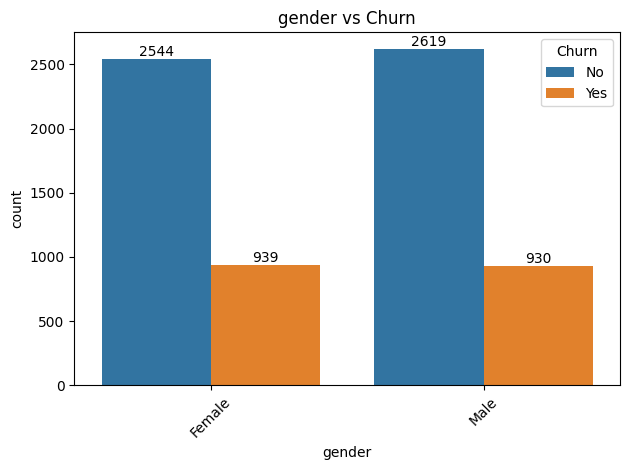


gender Analysis:
----------------------------------------
Female: 2544 not churned, 939 churned → 27.0% churned
Male: 2619 not churned, 930 churned → 26.2% churned




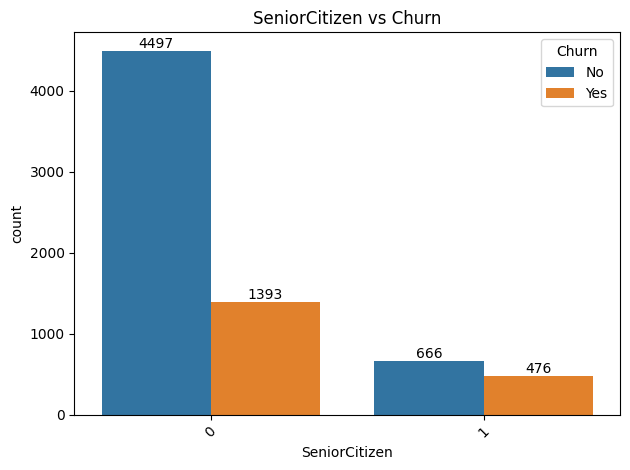


SeniorCitizen Analysis:
----------------------------------------
0: 4497 not churned, 1393 churned → 23.7% churned
1: 666 not churned, 476 churned → 41.7% churned




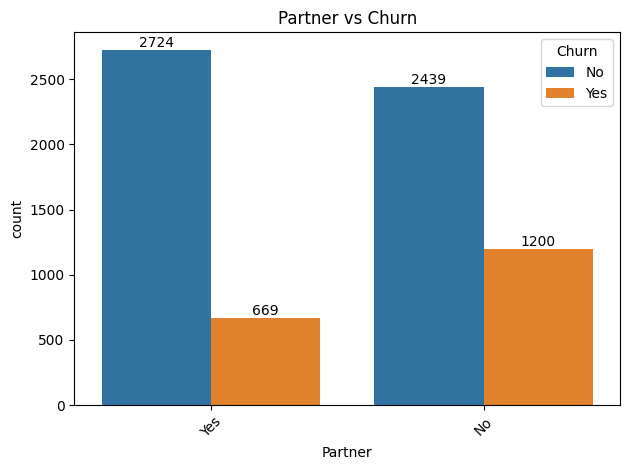


Partner Analysis:
----------------------------------------
Yes: 2724 not churned, 669 churned → 19.7% churned
No: 2439 not churned, 1200 churned → 33.0% churned




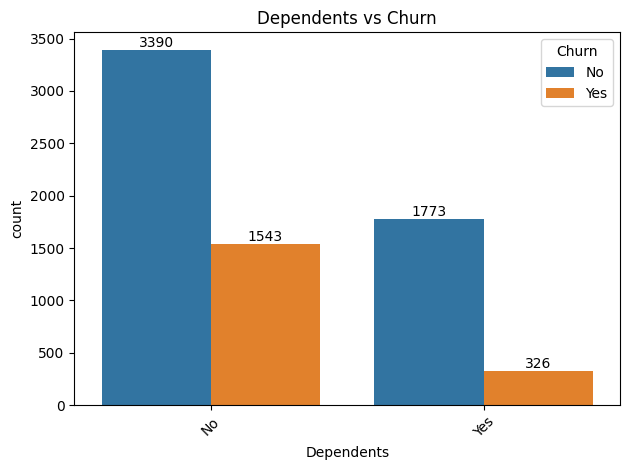


Dependents Analysis:
----------------------------------------
No: 3390 not churned, 1543 churned → 31.3% churned
Yes: 1773 not churned, 326 churned → 15.5% churned




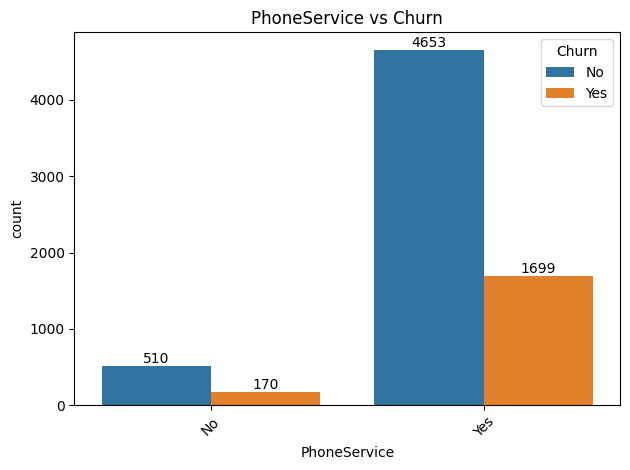


PhoneService Analysis:
----------------------------------------
No: 510 not churned, 170 churned → 25.0% churned
Yes: 4653 not churned, 1699 churned → 26.7% churned




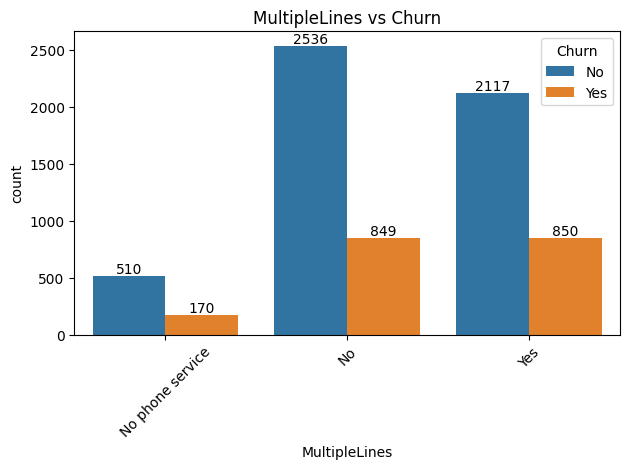


MultipleLines Analysis:
----------------------------------------
No phone service: 510 not churned, 170 churned → 25.0% churned
No: 2536 not churned, 849 churned → 25.1% churned
Yes: 2117 not churned, 850 churned → 28.6% churned




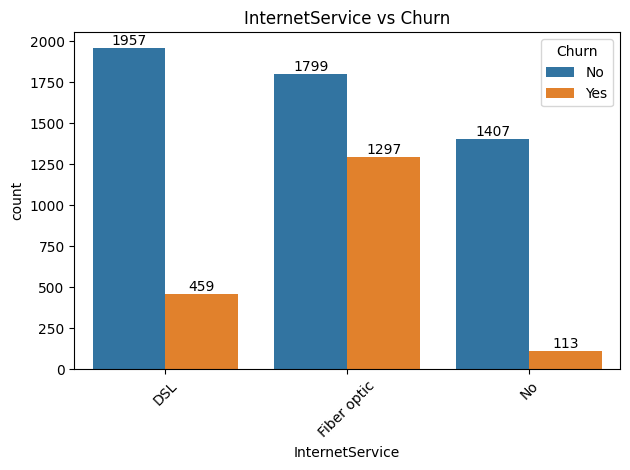


InternetService Analysis:
----------------------------------------
DSL: 1957 not churned, 459 churned → 19.0% churned
Fiber optic: 1799 not churned, 1297 churned → 41.9% churned
No: 1407 not churned, 113 churned → 7.4% churned




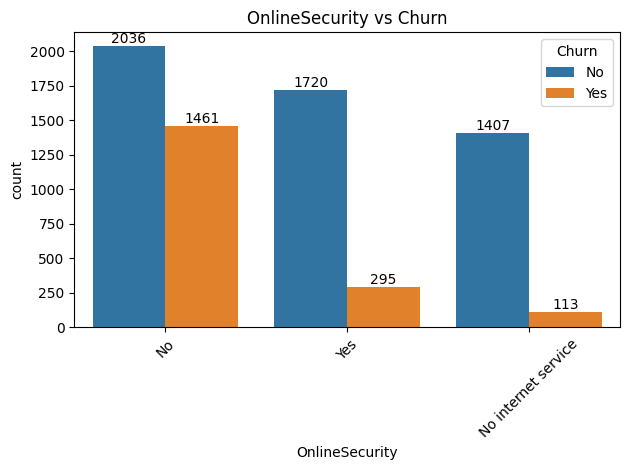


OnlineSecurity Analysis:
----------------------------------------
No: 2036 not churned, 1461 churned → 41.8% churned
Yes: 1720 not churned, 295 churned → 14.6% churned
No internet service: 1407 not churned, 113 churned → 7.4% churned




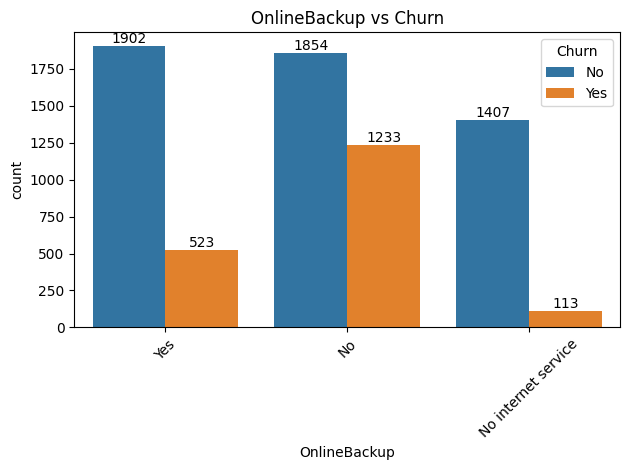


OnlineBackup Analysis:
----------------------------------------
Yes: 1902 not churned, 523 churned → 21.6% churned
No: 1854 not churned, 1233 churned → 39.9% churned
No internet service: 1407 not churned, 113 churned → 7.4% churned




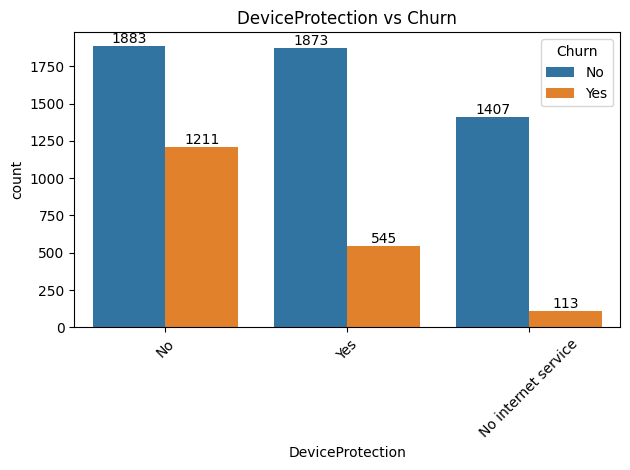


DeviceProtection Analysis:
----------------------------------------
No: 1883 not churned, 1211 churned → 39.1% churned
Yes: 1873 not churned, 545 churned → 22.5% churned
No internet service: 1407 not churned, 113 churned → 7.4% churned




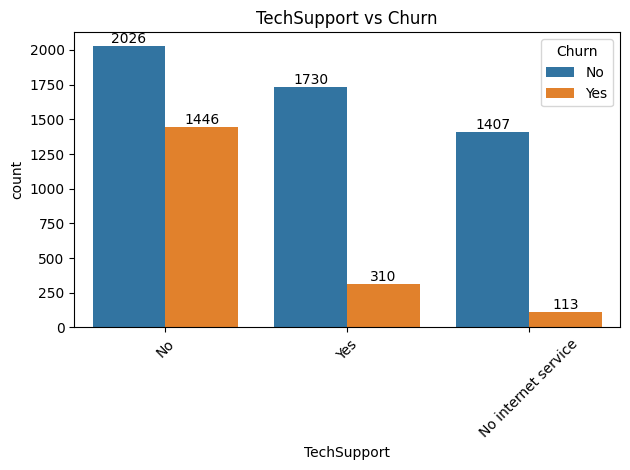


TechSupport Analysis:
----------------------------------------
No: 2026 not churned, 1446 churned → 41.6% churned
Yes: 1730 not churned, 310 churned → 15.2% churned
No internet service: 1407 not churned, 113 churned → 7.4% churned




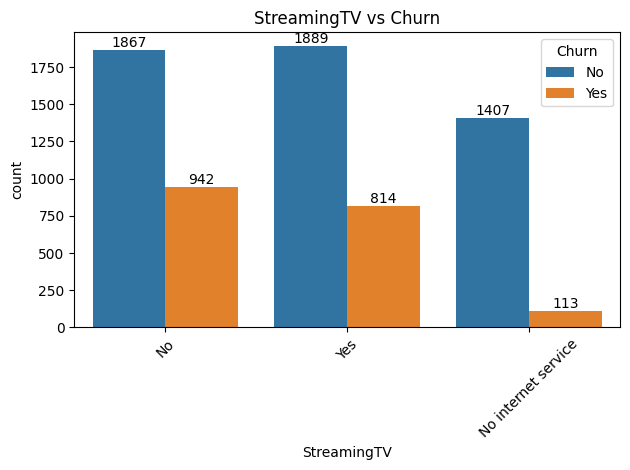


StreamingTV Analysis:
----------------------------------------
No: 1867 not churned, 942 churned → 33.5% churned
Yes: 1889 not churned, 814 churned → 30.1% churned
No internet service: 1407 not churned, 113 churned → 7.4% churned




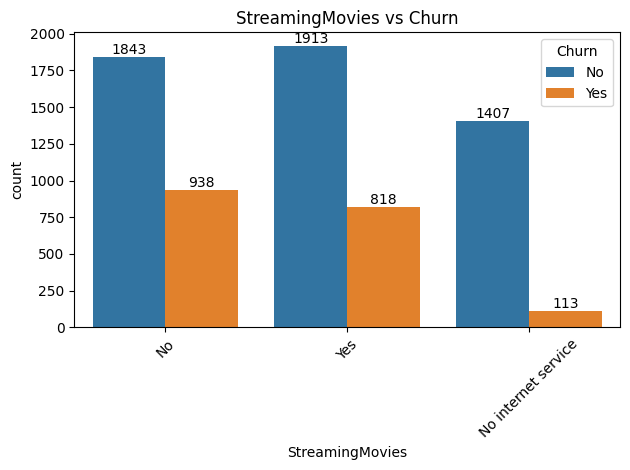


StreamingMovies Analysis:
----------------------------------------
No: 1843 not churned, 938 churned → 33.7% churned
Yes: 1913 not churned, 818 churned → 30.0% churned
No internet service: 1407 not churned, 113 churned → 7.4% churned




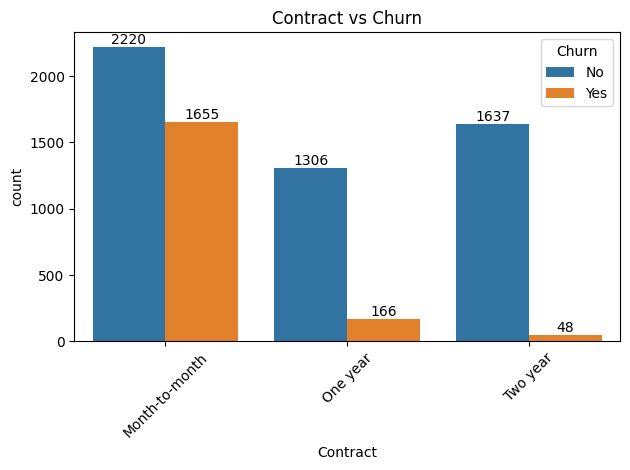


Contract Analysis:
----------------------------------------
Month-to-month: 2220 not churned, 1655 churned → 42.7% churned
One year: 1306 not churned, 166 churned → 11.3% churned
Two year: 1637 not churned, 48 churned → 2.8% churned




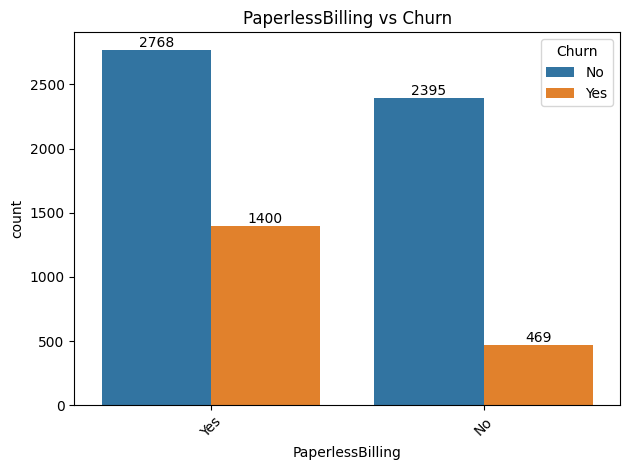


PaperlessBilling Analysis:
----------------------------------------
Yes: 2768 not churned, 1400 churned → 33.6% churned
No: 2395 not churned, 469 churned → 16.4% churned




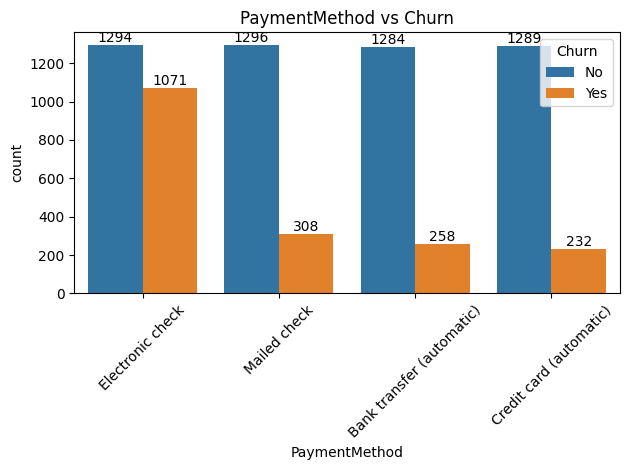


PaymentMethod Analysis:
----------------------------------------
Electronic check: 1294 not churned, 1071 churned → 45.3% churned
Mailed check: 1296 not churned, 308 churned → 19.2% churned
Bank transfer (automatic): 1284 not churned, 258 churned → 16.7% churned
Credit card (automatic): 1289 not churned, 232 churned → 15.3% churned




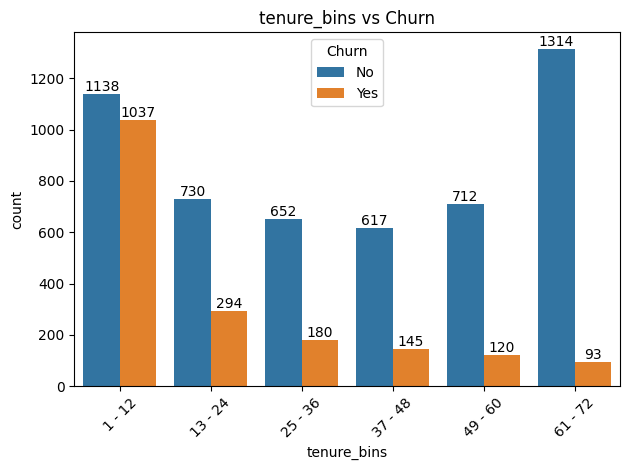


tenure_bins Analysis:
----------------------------------------
1 - 12: 1138 not churned, 1037 churned → 47.7% churned
25 - 36: 652 not churned, 180 churned → 21.6% churned
37 - 48: 617 not churned, 145 churned → 19.0% churned
13 - 24: 730 not churned, 294 churned → 28.7% churned
61 - 72: 1314 not churned, 93 churned → 6.6% churned
49 - 60: 712 not churned, 120 churned → 14.4% churned




In [19]:
# Countplot for each predictor variable
for i, predictor in enumerate(df_copy.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    ax = sns.countplot(data=df_copy, x=predictor, hue='Churn')
    
    # Add count labels on top of bars
    for container in ax.containers:
        ax.bar_label(container)
    
    plt.title(f'{predictor} vs Churn')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Calculate churn percentages for each category
    print(f"\n{predictor} Analysis:")
    print("-" * 40)
    
    crosstab = pd.crosstab(df_copy[predictor], df_copy['Churn'], margins=True)
    
    for category in df_copy[predictor].unique():
        total = crosstab.loc[category, 'All']
        churned = crosstab.loc[category, 'Yes']
        not_churned = crosstab.loc[category, 'No']
        churn_percentage = (churned / total) * 100
        
        print(f"{category}: {not_churned} not churned, {churned} churned → {churn_percentage:.1f}% churned")
    
    print("\n" + "="*50 + "\n")

### Insights from the plots:
* `Gender` alone has no affect on the `Churn` rate.
* `SeniorCitizen` senior citizens are more likely to churn.
* `Partner` customers with no partner are more likely to churn.
* `Dependents` customers that are not dependents are more likely not to churn.

* `Contract` monthly customers are more likely to churn.
* `PaymentMethod` customers that pay by electronic check are more likely to churn.

### Numerical Analysis

In [20]:
# Split the data into two dataframes
df_target0 = df_copy.loc[df_copy['Churn'] == 'No']
df_target1 = df_copy.loc[df_copy['Churn'] == 'Yes']

In [21]:
# testing numerical analysis method
pd.crosstab(df_copy.PaymentMethod, df_copy.Churn)

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),1284,258
Credit card (automatic),1289,232
Electronic check,1294,1071
Mailed check,1296,308


> I'll change `Churn` to binary variable --> No = 0, Yes = 1

In [22]:
df_copy.Churn = df_copy.Churn.replace({'No': 0, 'Yes': 1})
df_copy.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_bins
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


In [23]:
# Making sure `Churn` is numerical now
df_copy.Churn.dtype

dtype('int64')

> Changing all categorical columns into dummy variables

In [24]:
df_dummies = pd.get_dummies(df_copy, dtype=int, drop_first=False)
df_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_bins_1 - 12,tenure_bins_13 - 24,tenure_bins_25 - 36,tenure_bins_37 - 48,tenure_bins_49 - 60,tenure_bins_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


Using an "inside" information, I'll check the relationship between `MonthlyCharges` and `TotalCharges`.

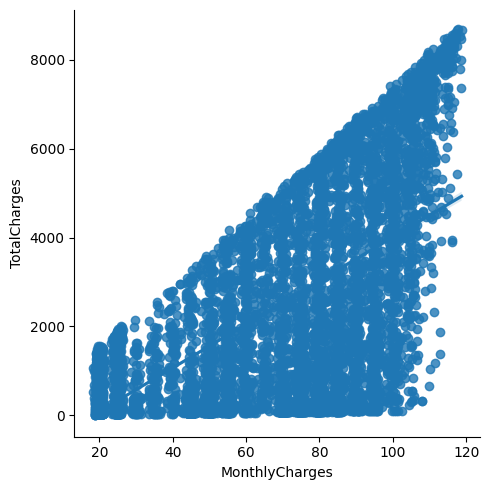

In [25]:
sns.lmplot(x="MonthlyCharges", y="TotalCharges", data=df_dummies)

In [26]:
round(df_dummies.MonthlyCharges.corr(df_dummies.TotalCharges) * 100, 2)

65.11

As expected --> MonthlyCharges and TotalCharges are highly correlated (65.11%) (TotalCharges increase with MonthlyCharges) 

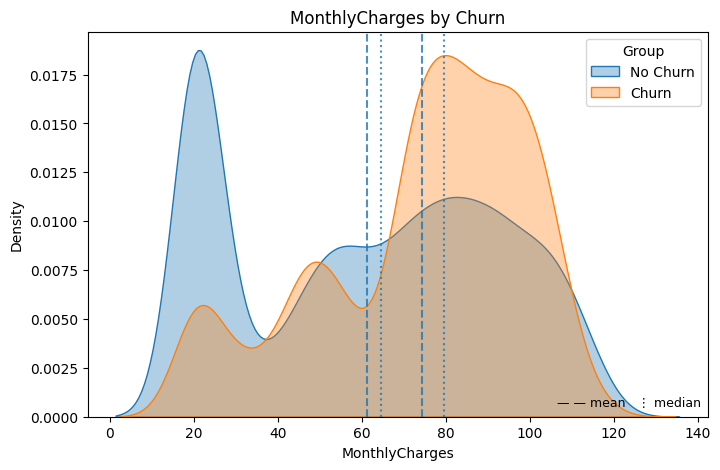

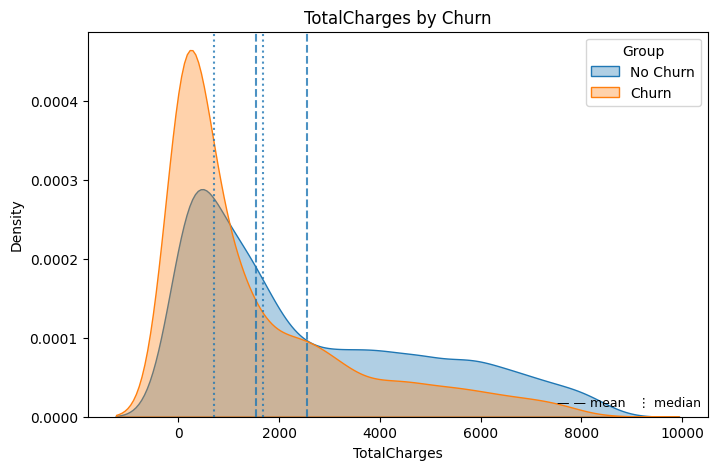

In [27]:
# Compare distributions for churn vs. no churn
import matplotlib.pyplot as plt
import seaborn as sns

def kde_with_markers(df, feature, target='Churn'):
    plt.figure(figsize=(8, 5))
    
    # No Churn (0)
    s0 = df.loc[df[target] == 0, feature]
    sns.kdeplot(s0, fill=True, alpha=0.35, label='No Churn')
    plt.axvline(s0.mean(), linestyle='--', alpha=0.8)
    plt.axvline(s0.median(), linestyle=':', alpha=0.8)

    # Churn (1)
    s1 = df.loc[df[target] == 1, feature]
    sns.kdeplot(s1, fill=True, alpha=0.35, label='Churn')
    plt.axvline(s1.mean(), linestyle='--', alpha=0.8)
    plt.axvline(s1.median(), linestyle=':', alpha=0.8)

    plt.title(f'{feature} by Churn')
    plt.xlabel(feature); plt.ylabel('Density')
    plt.legend(title='Group')
    plt.text(0.99, 0.02, '— — mean   ⋮ median', transform=plt.gca().transAxes,
             ha='right', va='bottom', fontsize=9)
    plt.show()

# Run for key numeric features
kde_with_markers(df_dummies, 'MonthlyCharges')
kde_with_markers(df_dummies, 'TotalCharges')

We can see that people are more likely to churn if their monthly charges are high.

We would expect to see the same graph, but we can see that people with low `TotalCharges` are more likely to churn.

Now let's see the correlation of every feature with the target variable.

<Axes: >

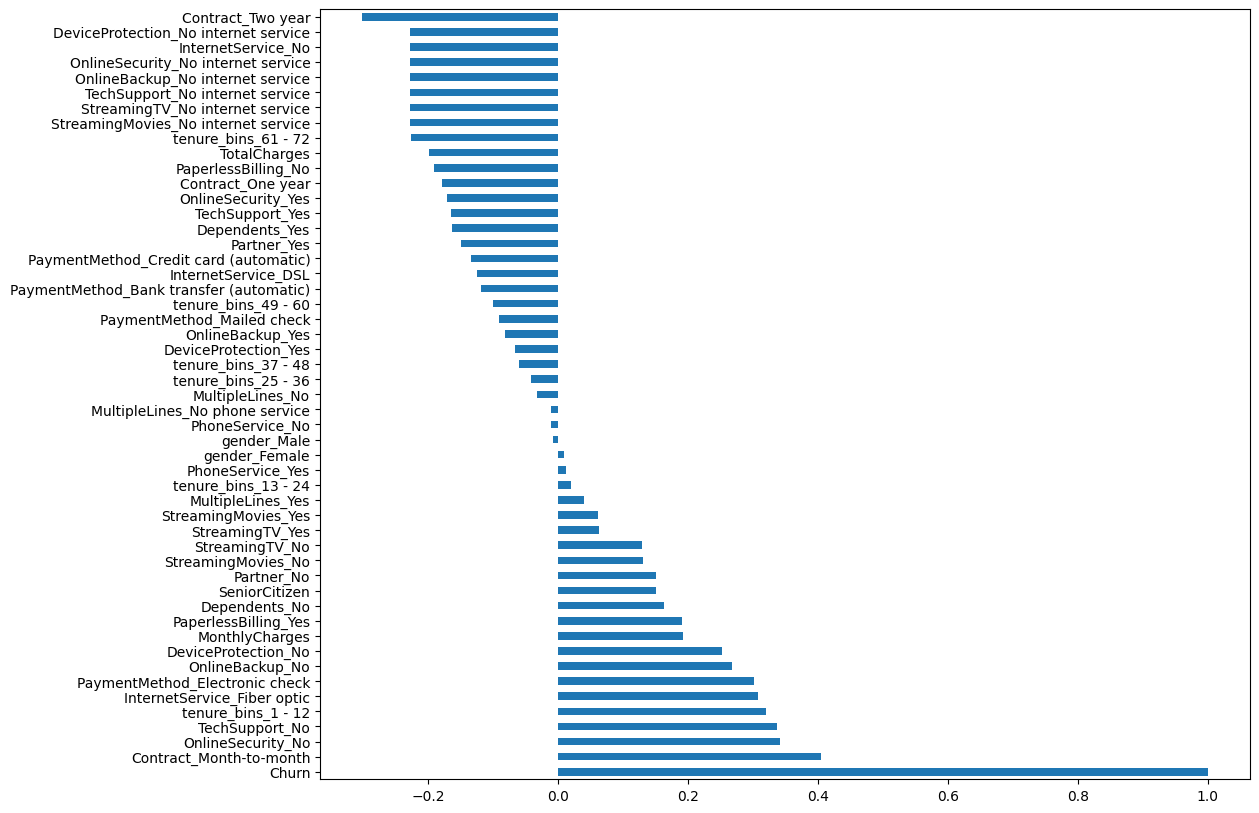

In [28]:
plt.figure(figsize=(12, 10))
df_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='barh')

From this graph we can gain some more useful insights:
* __HIGH CHANCE TO CHURN__: Month-to-month contracts, no online security, no tech support, first year of contract, and fiber internet service.
* __LOW CHANCE TO CHURN__: 2-year subscription, no internet service and 5+ years of contract.
* Factors such as Gender, Phone service and Multiple lines do not have a significant impact on the chance of churn.

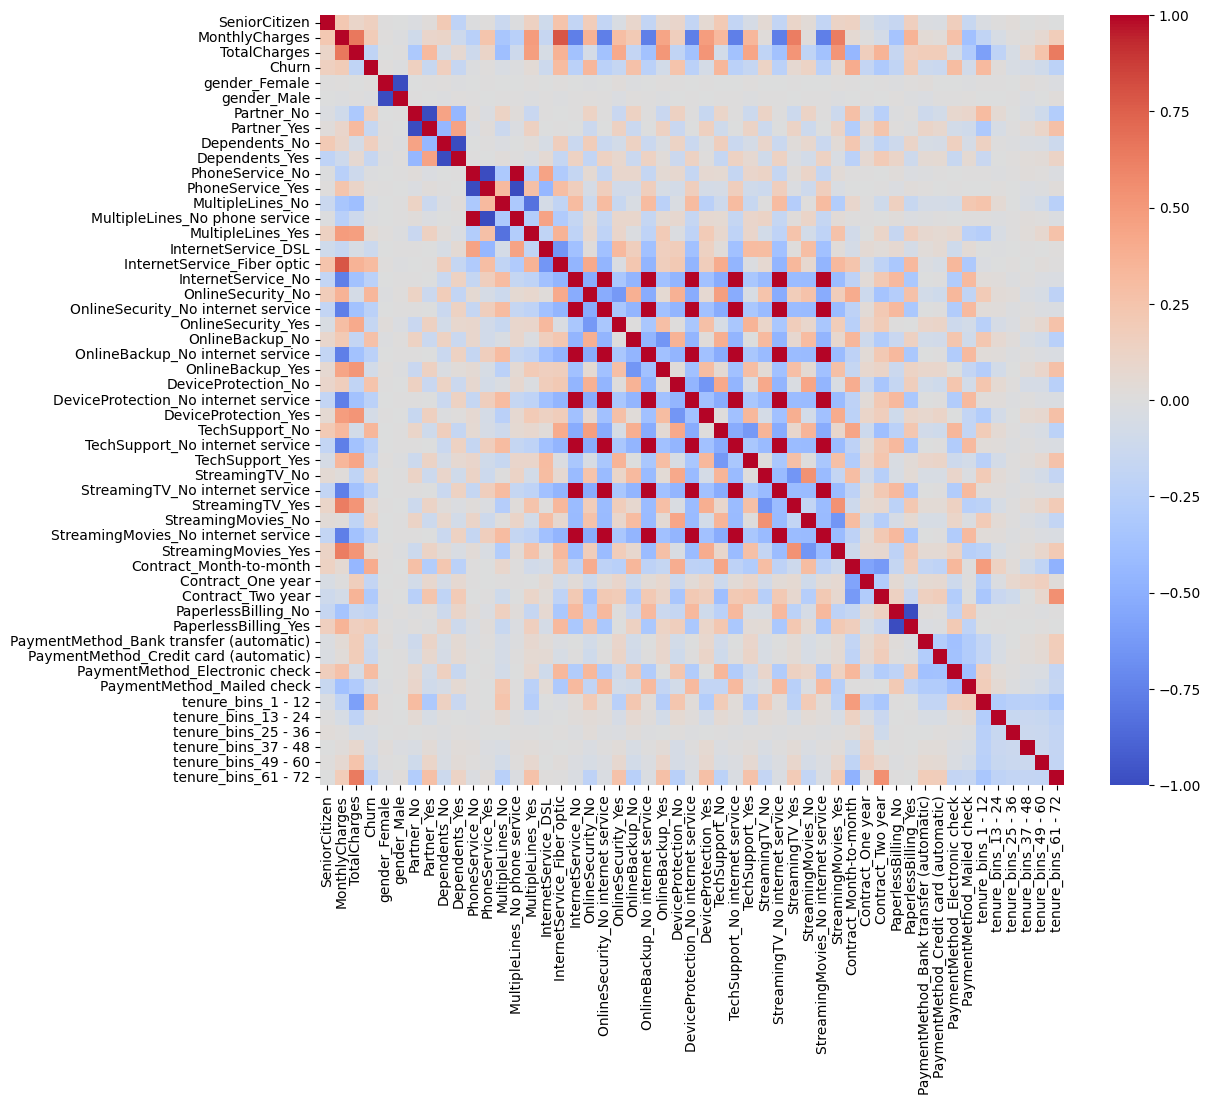

In [29]:
# Ploting also the heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df_dummies.corr(), cmap='coolwarm')
plt.show()


> This time, it's more useful to use the `barh` plot to gain a better understanding of the correlation between the features and the target variable.

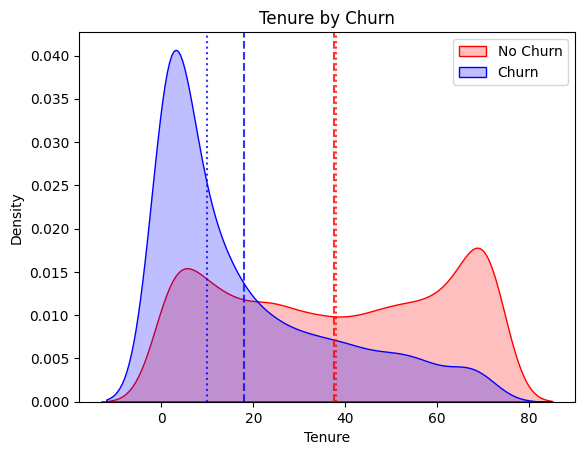

In [30]:
sns.kdeplot(df.tenure[(df.Churn == 'No')],
            color='Red', fill = True)
sns.kdeplot(df.tenure[(df.Churn == 'Yes')],
            color='Blue', fill = True)

plt.axvline(df.tenure[(df.Churn == 'No')].mean(), linestyle='--', alpha=0.8, color='Red')
plt.axvline(df.tenure[(df.Churn == 'No')].median(), linestyle=':', alpha=0.8, color='Red')
plt.axvline(df.tenure[(df.Churn == 'Yes')].mean(), linestyle='--', alpha=0.8, color='Blue')
plt.axvline(df.tenure[(df.Churn == 'Yes')].median(), linestyle=':', alpha=0.8, color='Blue')

plt.legend(['No Churn', 'Churn'])
plt.xlabel('Tenure')
plt.ylabel('Density')
plt.title('Tenure by Churn')
plt.show()

In [31]:
# Find all tenure bin dummy columns
tb_cols = [c for c in df_dummies.columns if c.startswith('tenure_bins_')]

# Create a readable 'tenure_bins' column from dummy columns
df_dummies['tenure_bins'] = df_dummies[tb_cols].idxmax(axis=1).str.replace('tenure_bins_', '', regex=False)

# Calculate churn percentage by tenure bin
tenure_churn = pd.crosstab(df_dummies['tenure_bins'], df_dummies['Churn'], normalize='index') * 100
tenure_churn.rename(columns={0: 'No Churn (%)', 1: 'Churn (%)'}, inplace=True)

display(tenure_churn.sort_index())

Churn,No Churn (%),Churn (%)
tenure_bins,,
1 - 12,52.321839,47.678161
13 - 24,71.289062,28.710938
25 - 36,78.365385,21.634615
37 - 48,80.971129,19.028871
49 - 60,85.576923,14.423077
61 - 72,93.390192,6.609808


From this graph and table we can see that:

* __High early churn risk__ — New customers are the most likely to leave.

* __Retention improves over time__ — If a customer stays long enough (especially past 1–2 years), they’re much more likely to remain loyal.

### Bivariate Analysis

In [32]:
df_target0 = df.loc[df['Churn'] == 'No']
df_target1 = df.loc[df['Churn'] == 'Yes']

In [33]:
# 
def uniplot(df, col, title, hue=None):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    
    temp = pd.Series(data=hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4 * len(temp.unique())
    fig.set_size_inches(width, 8)

    plt.xticks(rotation=45)
    plt.title(title)

    ax = sns.countplot(
        data=df,
        x=col,
        order=df[col].value_counts().index,
        hue=hue,
        palette='bright'
    )

    plt.show()


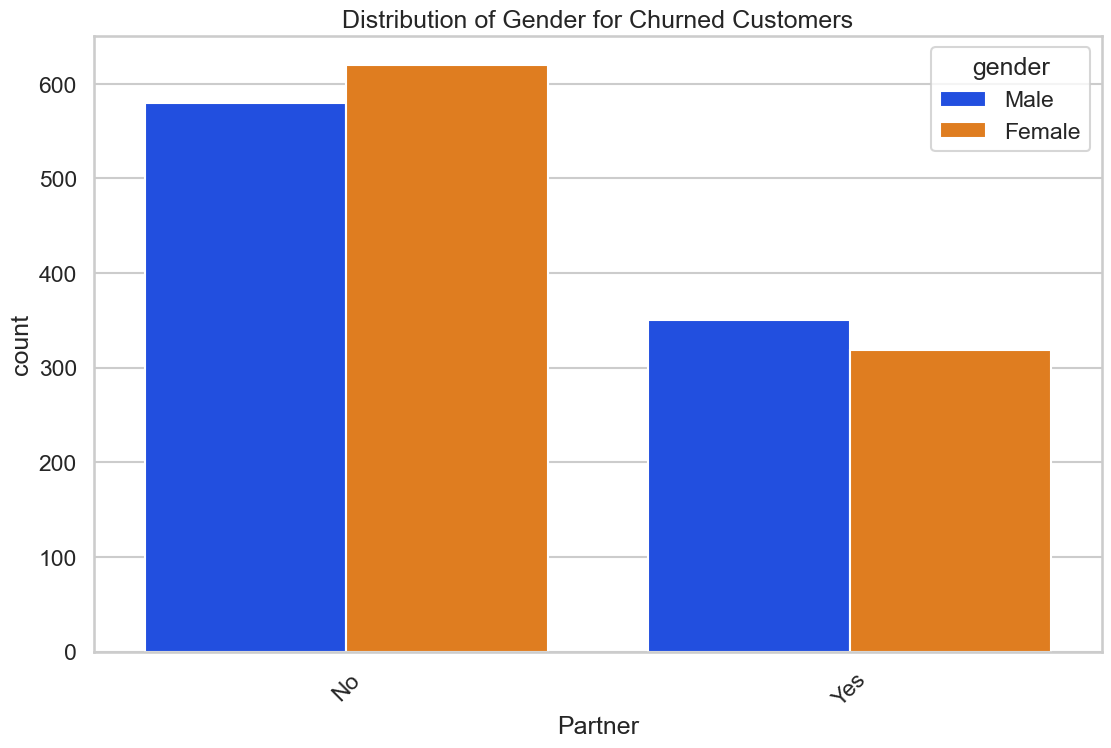

In [34]:
uniplot(df_target1, col='Partner', title='Distribution of Gender for Churned Customers', hue='gender')

> From this plot we can see that women __without__ a partner are more likely to churn. while men __with__ a partner are slightly more likely to churn.

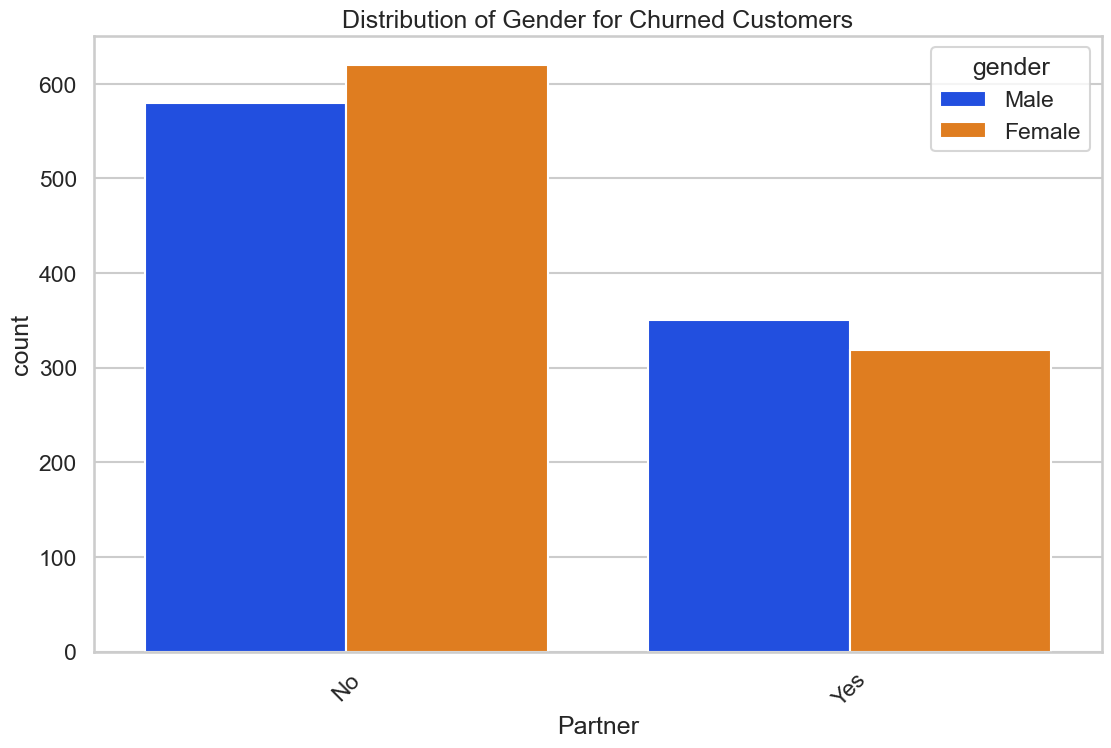

In [35]:
uniplot(df_target1, col='Partner', title='Distribution of Gender for Churned Customers', hue='gender')

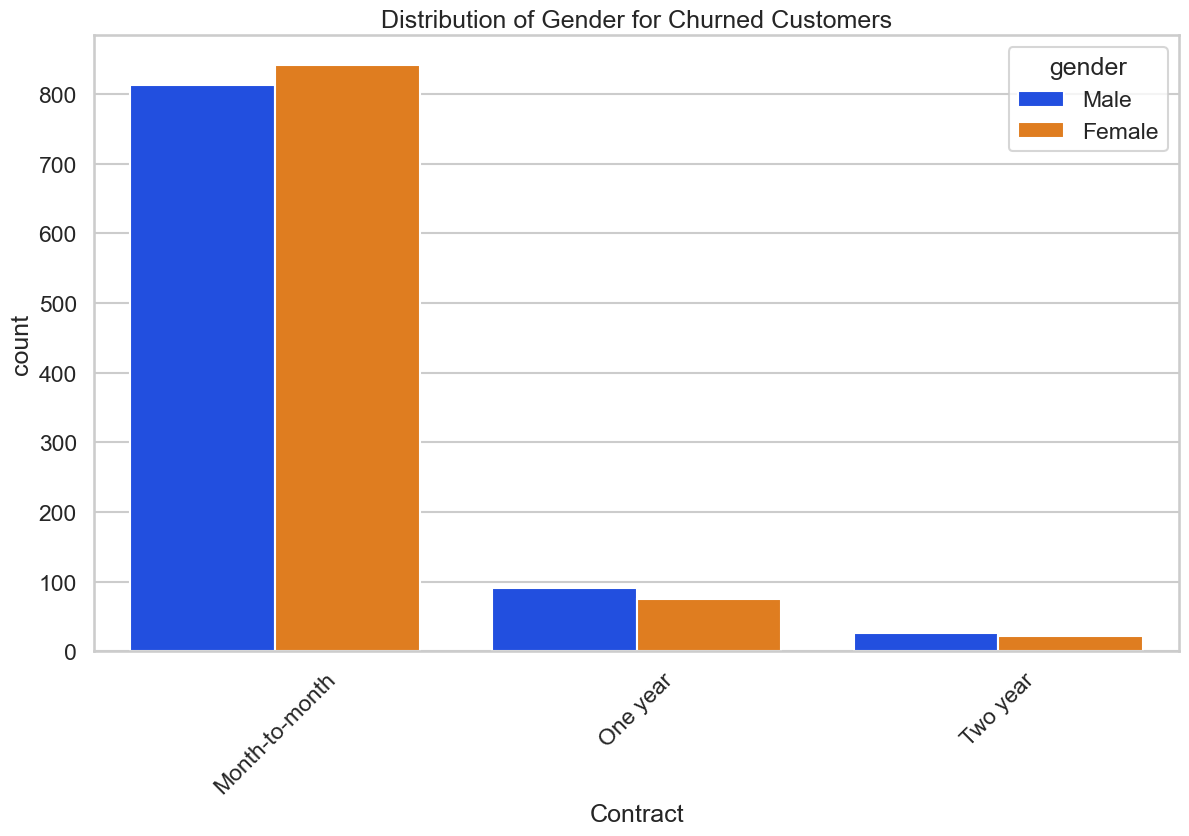

In [36]:
uniplot(df_target1, col='Contract', title='Distribution of Gender for Churned Customers', hue='gender')

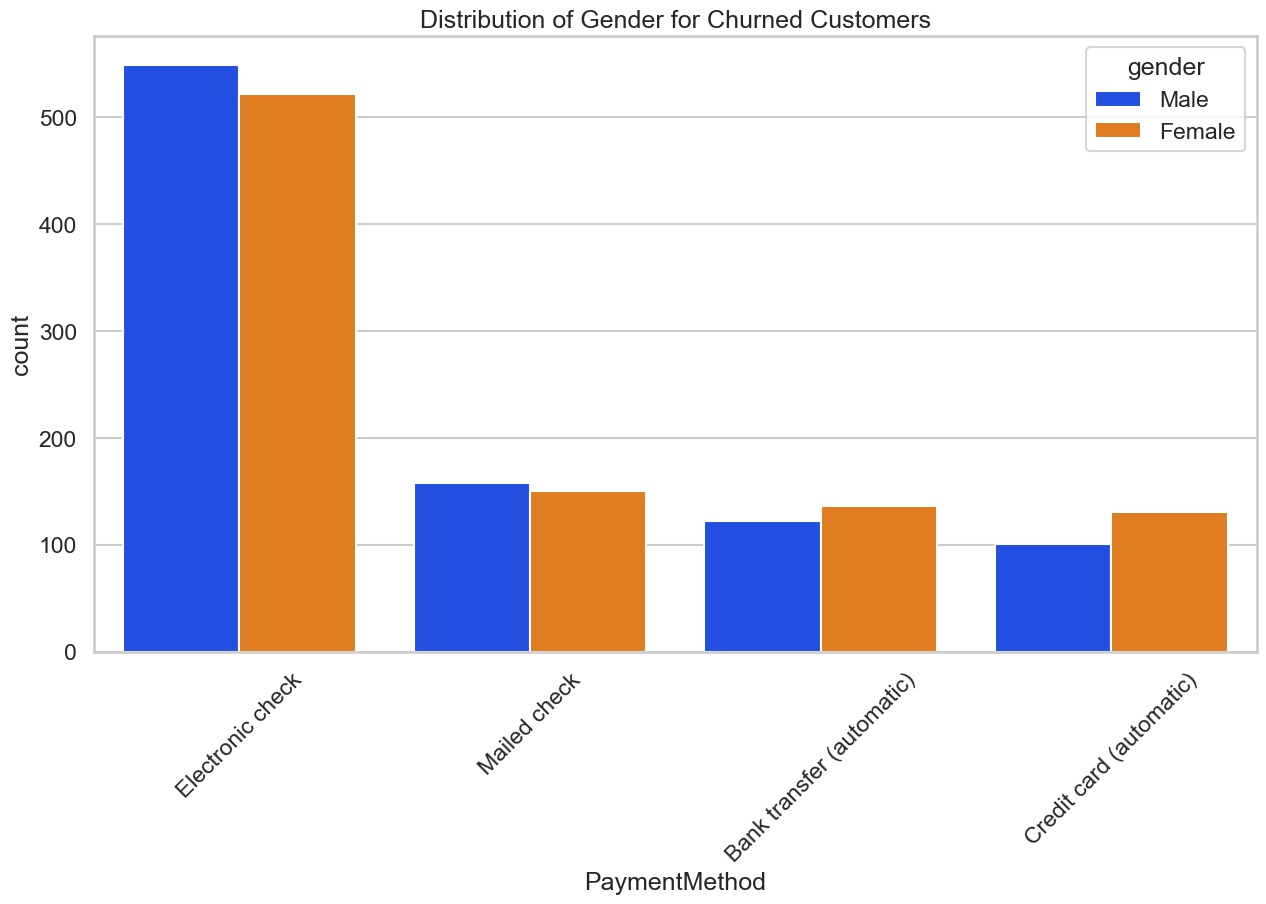

In [37]:
uniplot(df_target1, col='PaymentMethod', title='Distribution of Gender for Churned Customers', hue='gender')

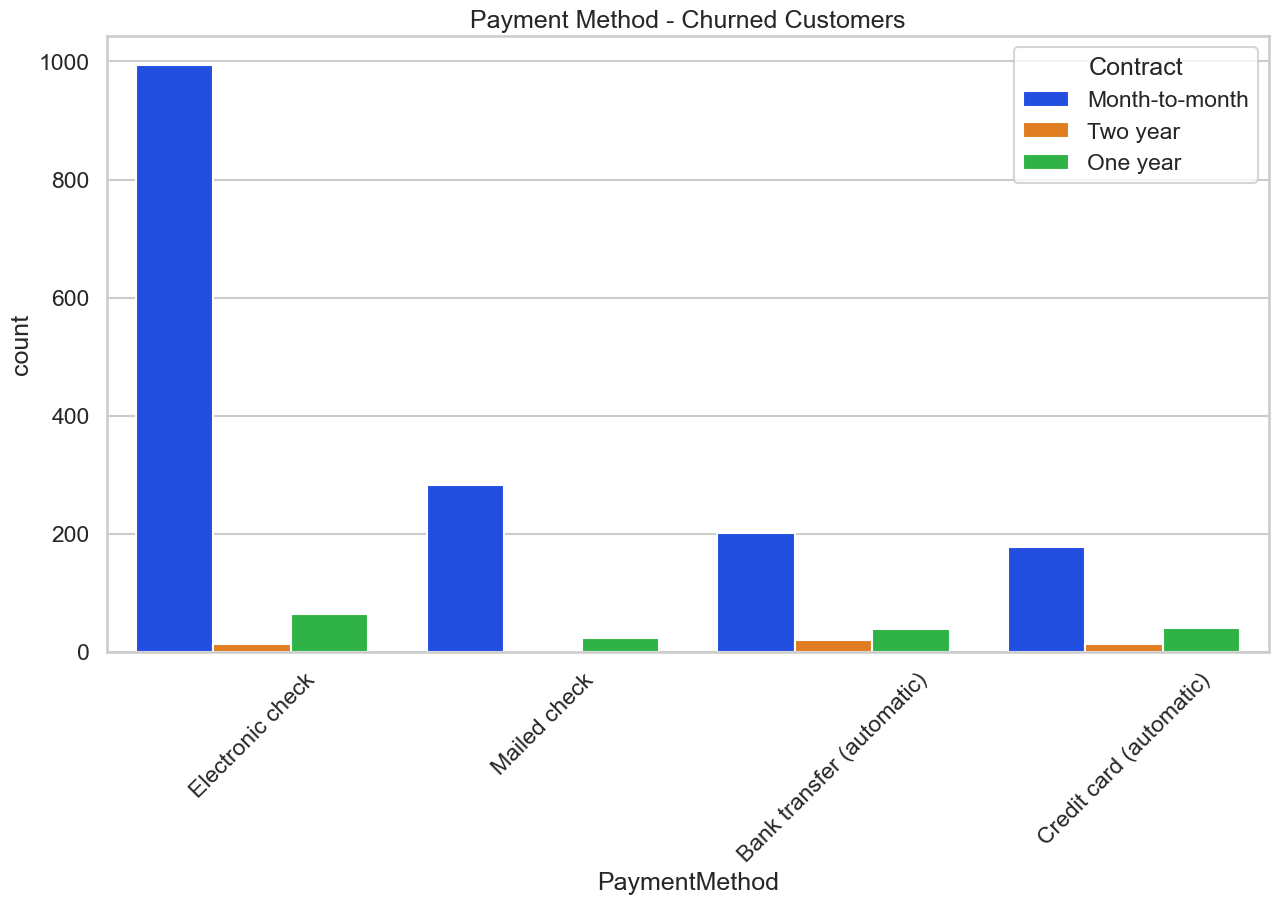

In [38]:
uniplot(df_target1, col='PaymentMethod', title='Payment Method - Churned Customers', hue='Contract')

## Building a predictive model for customer `Churn`

I'll try to build a few models for this classification problem:

1. Logistic Regression
2. Random Forest
3. XGBoost

In [39]:
# === 0) Imports
import numpy as np
import pandas as pd

# Sklearn modules for model building and evaluation
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix, precision_score, recall_score

# Try to use XGBoost if available; else we'll fall back to HistGradientBoosting
try:
    from xgboost import XGBClassifier
    HAS_XGB = True
except Exception:
    HAS_XGB = False

try:
    from skopt import BayesSearchCV
    from skopt.space import Real, Integer, Categorical
    HAS_BAYES = True
except Exception:
    HAS_BAYES = False
    
print(HAS_BAYES)

# === 1) Utilities: target, feature lists, and safe imputations
def prepare_xy(df):
    """
    Prepare feature matrix X and target vector y from the input dataframe.
    Separates numeric and categorical features for preprocessing.
    """
    df = df.copy()

    # Ensure target is numeric 0/1
    if df['Churn'].dtype == 'O':
        df['Churn'] = df['Churn'].replace({'No': 0, 'Yes': 1}).astype(int)

    target = 'Churn'
    y = df[target].values

    # Numeric features: tenure removed by design (using tenure_bins instead)
    candidate_num = {'MonthlyCharges', 'TotalCharges'}
    numeric_features = [c for c in df.columns if c in candidate_num]

    # Categorical: everything else (keep tenure_bins categorical if present)
    drop_like = {'customerID'}  # Features to exclude
    categorical_features = [
        c for c in df.columns
        if c not in numeric_features
        and c != target
        and c not in drop_like
    ]

    # X matrix - drop target and unwanted columns
    X = df.drop(columns=[target] + list(drop_like & set(df.columns)), errors='ignore')

    return X, y, numeric_features, categorical_features

# === 2) Metrics helper
def evaluate_model(name, model, X_test, y_test, proba_name='predict_proba'):
    """
    Evaluate model performance using AUC, precision, recall, and confusion matrix.
    """
    # Get probability predictions for AUC calculation
    if hasattr(model, proba_name):
        p = getattr(model, proba_name)(X_test)
        p1 = p[:, 1] if isinstance(p, np.ndarray) and p.ndim == 2 else p
    else:
        raise ValueError(f"{name} has neither predict_proba nor decision_function")

    # Convert probabilities to binary predictions
    # After some testing, 0.3 was found to be the best threshold
    y_pred = (p1 >= 0.3).astype(int)

    # Calculate evaluation metrics
    auc = roc_auc_score(y_test, p1)
    prec_class0 = precision_score(y_test, y_pred, pos_label=0)  # Precision for "No Churn"
    rec_class1  = recall_score(y_test, y_pred, pos_label=1)   # Recall for "Churn"
    cm = confusion_matrix(y_test, y_pred)

    return {
        'model': name,
        'AUC': round(auc, 4),
        'Precision(No Churn)': round(prec_class0, 4),
        'Recall(Churn)': round(rec_class1, 4),
        'ConfusionMatrix': cm
    }

# === 3) Build pipelines
def make_pipelines(numeric_features, categorical_features, y_train):
    """
    Create preprocessing pipelines and model configurations for all three algorithms.
    Handles class imbalance through various techniques.
    """
    # Preprocessing for logistic regression (needs scaling)
    numeric_scaler = StandardScaler()
    ohe = OneHotEncoder(drop='first', handle_unknown='ignore')

    # Column transformer for logistic regression (with scaling)
    ct_logreg = ColumnTransformer(
        transformers=[
            ('num', numeric_scaler, numeric_features),
            ('cat', ohe, categorical_features)
        ],
        remainder='drop'
    )

    # Column transformer for tree-based models (no scaling needed)
    ct_tree = ColumnTransformer(
        transformers=[
            ('num', 'passthrough', numeric_features),
            ('cat', ohe, categorical_features)
        ],
        remainder='drop'
    )

    # Calculate class imbalance weights
    pos = max((y_train == 1).sum(), 1)  # Count of churned customers
    neg = max((y_train == 0).sum(), 1)  # Count of non-churned customers
    scale_pos_weight = neg / pos        # Weight for XGBoost
    class_weight_balanced = 'balanced'  # Balanced class weights for sklearn

    # Logistic Regression Pipeline
    logreg = Pipeline(steps=[
        ('prep', ct_logreg),
        ('clf', LogisticRegression(max_iter=2000, class_weight=class_weight_balanced))
    ])

    # Random Forest Pipeline
    rf = Pipeline(steps=[
        ('prep', ct_tree),
        ('clf', RandomForestClassifier(
            n_estimators=400, 
            max_depth=None, 
            class_weight=class_weight_balanced, 
            random_state=42, 
            n_jobs=-1  # Use all available cores
        ))
    ])

    # Gradient Boosting Pipeline (XGBoost preferred, HistGradientBoosting as fallback)
    if HAS_XGB:
        gbm = Pipeline(steps=[
            ('prep', ct_tree),
            ('clf', XGBClassifier(
                n_estimators=600,
                max_depth=4,
                learning_rate=0.05,
                subsample=0.9,              # Row sampling
                colsample_bytree=0.9,       # Feature sampling
                eval_metric='logloss',
                scale_pos_weight=scale_pos_weight,  # Handle class imbalance
                random_state=42,
                n_jobs=-1
            ))
        ])
    else:
        # Fallback to sklearn's HistGradientBoostingClassifier
        gbm = Pipeline(steps=[
            ('prep', ct_tree),
            ('clf', HistGradientBoostingClassifier(
                max_depth=None, 
                learning_rate=0.06, 
                max_bins=255, 
                random_state=42
            ))
        ])

    return logreg, rf, gbm, HAS_XGB

True


In [40]:
# === 4) Train / evaluate all 3 models (with optional Bayesian Optimization)
def run_all(df, tune=False, bayes_iters=None):
    """
    Prepare data, (optionally tune via Bayesian Optimization), train models, and evaluate on a hold-out test set.
    tune:
        False  -> no tuning (fast)
        'bayes' -> Bayesian optimization with BayesSearchCV (requires scikit-optimize)
    bayes_iters:
        Dict to override iterations per model, e.g. {'lr': 16, 'rf': 24, 'gbm': 32}
    """
    # 4.1) Prepare features and target
    X, y, num_cols, cat_cols = prepare_xy(df)

    # 4.2) Split data into train/test sets (80/20 split, stratified)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42
    )

    # 4.3) Create model pipelines
    logreg, rf, gbm, using_xgb = make_pipelines(num_cols, cat_cols, y_train)

    # 4.4) Optional Bayesian Optimization
    if tune == 'bayes':
        if not HAS_BAYES:
            raise ImportError("Bayesian tuning requested but scikit-optimize is not installed. Run: pip install scikit-optimize")

        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        # Default # of iterations (you can override via bayes_iters)
        iters = {'lr': 16, 'rf': 24, 'gbm': 32}
        if isinstance(bayes_iters, dict):
            iters.update({k: int(v) for k, v in bayes_iters.items()})

        # --- Search spaces (prefixed with 'clf__' because the model is inside a Pipeline) ---
        lr_space = {
            'clf__C': Real(1e-3, 10.0, prior='log-uniform'),
            'clf__penalty': Categorical(['l2']),
            'clf__solver': Categorical(['lbfgs']),  # stable for l2 with OHE
        }

        rf_space = {
            'clf__n_estimators': Integer(200, 1000),
            'clf__max_depth': Categorical([None, 6, 10, 16, 24]),
            'clf__min_samples_split': Integer(2, 20),
            'clf__min_samples_leaf': Integer(1, 10),
            'clf__max_features': Categorical(['sqrt', 'log2', None]),
        }

        if using_xgb:
            gbm_space = {
                'clf__n_estimators': Integer(300, 1200),
                'clf__max_depth': Integer(3, 10),
                'clf__learning_rate': Real(0.01, 0.2, prior='log-uniform'),
                'clf__subsample': Real(0.6, 1.0),
                'clf__colsample_bytree': Real(0.6, 1.0),
                'clf__min_child_weight': Integer(1, 12),
                'clf__reg_lambda': Real(0.5, 10.0, prior='log-uniform'),
            }
        else:
            gbm_space = {
                'clf__learning_rate': Real(0.02, 0.2, prior='log-uniform'),
                'clf__max_depth': Categorical([None, 6, 12, 18, 24]),
                'clf__max_leaf_nodes': Integer(31, 255),
                'clf__min_samples_leaf': Integer(10, 200),
                'clf__l2_regularization': Real(0.0, 2.0),
                'clf__max_bins': Integer(128, 255),
            }

        # --- BayesSearchCV wrappers ---
        lr_bayes = BayesSearchCV(
            estimator=logreg,
            search_spaces=lr_space,
            n_iter=iters['lr'],
            scoring='roc_auc',
            cv=cv,
            n_jobs=-1,
            refit=True,
            random_state=42,
            verbose=0
        )

        rf_bayes = BayesSearchCV(
            estimator=rf,
            search_spaces=rf_space,
            n_iter=iters['rf'],
            scoring='roc_auc',
            cv=cv,
            n_jobs=-1,
            refit=True,
            random_state=42,
            verbose=0
        )

        gbm_bayes = BayesSearchCV(
            estimator=gbm,
            search_spaces=gbm_space,
            n_iter=iters['gbm'],
            scoring='roc_auc',
            cv=cv,
            n_jobs=-1,
            refit=True,
            random_state=42,
            verbose=0
        )

        # --- Fit searches (pipelines avoid leakage by fitting preprocessors inside CV) ---
        lr_bayes.fit(X_train, y_train)
        rf_bayes.fit(X_train, y_train)

        if using_xgb:
            gbm_bayes.fit(X_train, y_train)
        else:
            # HistGradientBoosting benefits from class-aware weighting; pass via fit params
            # We'll derive balanced sample weights for each CV split automatically is hard,
            # so we fit the final best estimator again with weights right after the search.
            gbm_bayes.fit(X_train, y_train)

        # Replace pipelines with the best found
        logreg = lr_bayes.best_estimator_
        rf     = rf_bayes.best_estimator_
        gbm    = gbm_bayes.best_estimator_

        # (Optional) Inspect best params / scores:
        # print("LR best:", lr_bayes.best_params_, lr_bayes.best_score_)
        # print("RF best:", rf_bayes.best_params_, rf_bayes.best_score_)
        # print("GBM best:", gbm_bayes.best_params_, gbm_bayes.best_score_)

    # 4.5) Train final models on the full training split (tuned or untuned) and evaluate
    results = []

    logreg.fit(X_train, y_train)
    results.append(evaluate_model('LogisticRegression', logreg, X_test, y_test))

    rf.fit(X_train, y_train)
    results.append(evaluate_model('RandomForest', rf, X_test, y_test))

    if using_xgb:
        gbm.fit(X_train, y_train)
        results.append(evaluate_model('XGBoost', gbm, X_test, y_test))
    else:
        # For HistGradientBoosting, pass class-balanced sample weights on the final fit
        w0 = len(y_train) / (2 * (y_train == 0).sum())
        w1 = len(y_train) / (2 * (y_train == 1).sum())
        sample_weight = np.where(y_train == 1, w1, w0)
        gbm.fit(X_train, y_train, clf__sample_weight=sample_weight)
        results.append(evaluate_model('HistGradientBoosting', gbm, X_test, y_test))

    # 4.6) Create summary dataframe sorted by AUC score
    out = pd.DataFrame([{
        'Model': r['model'],
        'AUC': r['AUC'],
        'Precision(No Churn)': r['Precision(No Churn)'],  # Non-churn precision
        'Recall(Churn)': r['Recall(Churn)'],        # Churn recall
        'ConfusionMatrix': r['ConfusionMatrix']
    } for r in results]).sort_values('AUC', ascending=False).reset_index(drop=True)

    return out, results

In [43]:
# === 5) RUN THE ANALYSIS
# Execute all models and display results
summary_df, detailed = run_all(df_copy, tune='bayes', bayes_iters={'lr':10, 'rf':10, 'gbm':10})
summary_df

,Model,AUC,Precision(No Churn),Recall(Churn),ConfusionMatrix
0,RandomForest,0.8348,0.9343,0.8904,"[[583, 450], [41, 333]]"
1,LogisticRegression,0.8294,0.9551,0.9305,"[[553, 480], [26, 348]]"
2,XGBoost,0.8244,0.9233,0.8583,"[[638, 395], [53, 321]]"


## Model Evaluation Results

I've compared **Logistic Regression**, **Random Forest**, and **XGBoost** for churn prediction, using stratified train/test split and Bayesian optimization to maximize precision and recall.  
Performance was measured with **AUC**, **Precision for Non-Churn (class 0)**, and **Recall for Churn (class 1)** to balance ranking ability with business-specific error costs.

| Model               | AUC    | Precision (No Churn) | Recall (Churn) |
|---------------------|--------|----------------------|----------------|
| RandomForest        | 0.8348 | 0.9343               | 0.8904         |
| LogisticRegression  | 0.8294 | 0.9551               | 0.9305         |
| XGBoost             | 0.8244 | 0.9233               | 0.8583         |

**Key insights:**
- **Random Forest** achieved the highest **AUC**, meaning it is the best at ranking churners over non-churners overall.
- **Logistic Regression** delivered the **best recall for churners** (93.05%) and the **highest precision for non-churners** (95.51%), making it ideal when the business goal is to **catch nearly all churners without flagging too many loyal customers**.
- **XGBoost** had competitive results but lagged slightly in both recall and precision.

**Business decision trade-off:**
- On one hand, if the business prioritizes **catching as many churners as possible** and **avoiding false “no-churn” predictions**, **Logistic Regression** will be the best fit.
- On the other hand, if the business needs **overall best ranking ability** (for example, when using probabilities for further segmentation), **Random Forest** might be preferred.

---

# Conclusion

I began with an in-depth **Exploratory Data Analysis (EDA)** to understand the churn dataset, its distributions, relationships, and potential data quality issues.  
Key steps included:
- **Data quality checks** → identified and handled missing `TotalCharges` values and removed unnecessary ID columns.
- **Feature understanding** → explored distributions, categorical breakdowns, and numerical trends; engineered `tenure_bins` to capture tenure patterns.
- **Correlation analysis** → examined numeric and encoded categorical features against `Churn` to spot strong and weak predictors.
- **Class balance check** → confirmed dataset imbalance, informing the later modeling strategy.

Following EDA, I trained and evaluated three models. 
**Key findings:**
- **Random Forest** achieved the highest AUC, excelling in overall ranking ability.
- **Logistic Regression** delivered the top combination of **precision for non-churners** and **recall for churners**, making it best suited for a goal of catching nearly all churners while minimizing false “no-churn” predictions.
- **XGBoost** was competitive but slightly behind in both recall and precision.

**Summary:**  
EDA revealed critical patterns and guided preprocessing choices, while modeling confirmed that **Logistic Regression** offers the most balanced performance for our business objective, with Random Forest as a strong alternative for ranking-focused use cases.